In [43]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [45]:
#oceanographic data: salinity vs temperature
df=pd.read_csv('./bottle.csv')
df=df.sample(n=20000)
df.to_csv('./oceanographic_data.csv')

In [15]:
df=df[["T_degC", "Salnty", "Depthm"]]
df.rename(columns={
        "T_degC": "Temperature",
        "Salnty": "Salinity",
        "Depthm": "Depth"
    }, inplace=True)
df.head()

Temperature  Salinity  Depth
8572           5.02    34.380    765
597258        13.32    33.099     20
819559        16.48    33.362     92
332710        12.82    33.924    132
144822        12.10    33.370     10

In [16]:
df['Temperature']= df['Temperature'].fillna(method="ffill")
df['Salinity']=df['Salinity'].fillna(method="ffill")
df['Depth']=df['Depth'].fillna(method="ffill")
df.describe()

Temperature      Salinity         Depth
count  20000.000000  20000.000000  20000.000000
mean      10.805155     33.835887    224.384550
std        4.235003      0.463002    309.848845
min        1.490000     30.886000      0.000000
25%        7.700000     33.480000     46.000000
50%       10.090000     33.860000    125.000000
75%       13.850000     34.194325    300.000000
max       29.820000     36.605000   4865.000000

In [17]:
df.corr()

Temperature  Salinity     Depth
Temperature     1.000000 -0.470985 -0.677913
Salinity       -0.470985  1.000000  0.528705
Depth          -0.677913  0.528705  1.000000

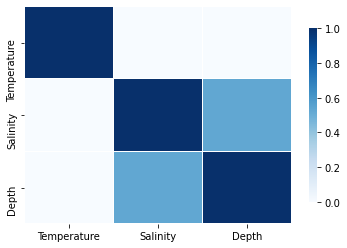

In [24]:
ax1=sns.heatmap(df.corr(),cmap="Blues", vmin= 0, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

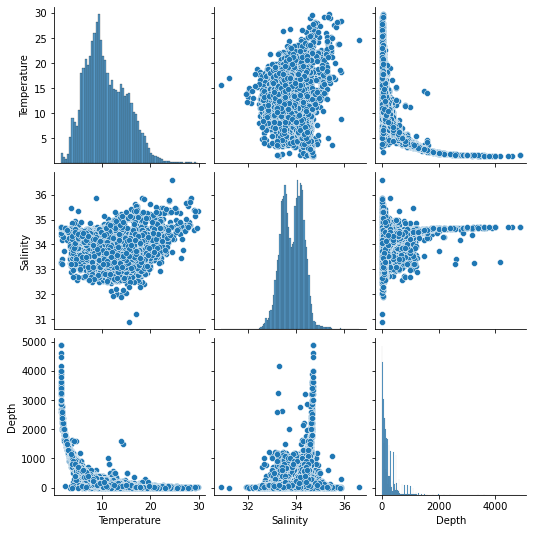

In [25]:
sns.pairplot(data=df)

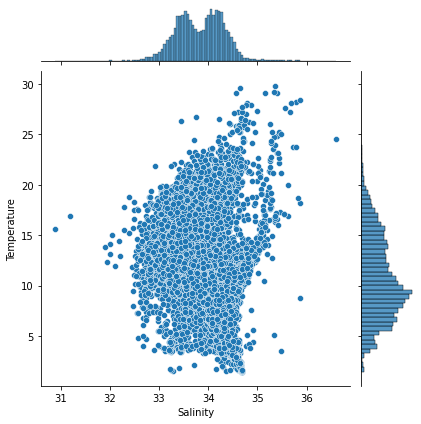

In [27]:
sns.jointplot(data=df, x="Salinity", y="Temperature")

In [30]:
# training and test data splits and training linear regression model
X_train, X_test, y_train, y_test = train_test_split(df[['Salinity', "Depth"]].values, 
                                                    df[["Temperature"]].values,
                                                    test_size=0.2,
                                                    random_state=34)
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
model.coef_

array([[-1.42391327, -0.00805512]])

In [34]:
y_pred = model.predict(X_test)
print("Linear Regression score: %.2f" % model.score(X_train, y_train))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test))

Linear Regression score: 0.47
Mean absolute error: 2.26
Residual sum of squares (MSE): 8.81
R2-score: -0.06


In [39]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_poly=polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
poly_model=linear_model.LinearRegression()
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [41]:
poly_y_pred=poly_model.predict(X_test_poly)
print("poly Regression score: %.2f" % poly_model.score(X_train_poly, y_train))
print("Mean absolute error: %.2f" % np.mean(np.absolute(poly_y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((poly_y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(poly_y_pred , y_test))

poly Regression score: 0.66
Mean absolute error: 1.86
Residual sum of squares (MSE): 6.24
R2-score: 0.51
